## **<u>Rossmann Store Sales Analysis**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%mkdir /gdrive/MyDrive/CSE/519/fall/2021/HW3 

mkdir: cannot create directory ‘/gdrive/MyDrive/CSE/519/fall/2021/HW3’: File exists


In [ ]:
%cd /gdrive/MyDrive/CSE/519/fall/2021/HW3

/gdrive/MyDrive/CSE/519/fall/2021/HW3


In [ ]:
%ls /root -al

total 60
drwx------ 1 root root 4096 Sep 30 19:45 ./
drwxr-xr-x 1 root root 4096 Sep 30 20:20 ../
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc*
drwxr-xr-x 1 root root 4096 Sep 29 13:20 .cache/
drwxr-xr-x 1 root root 4096 Sep 30 20:20 .config/
drwxr-xr-x 3 root root 4096 Sep 27 13:16 .gsutil/
drwxr-xr-x 5 root root 4096 Sep 29 13:18 .ipython/
drwx------ 2 root root 4096 Sep 29 13:18 .jupyter/
drwxr-xr-x 2 root root 4096 Sep 30 19:45 .keras/
drwx------ 1 root root 4096 Sep 29 13:18 .local/
drwxr-xr-x 4 root root 4096 Sep 29 13:18 .npm/
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf*


In [ ]:
!pip install permutation_test

  Created wheel for permutation-test: filename=permutation_test-0.18-py3-none-any.whl size=17054 sha256=bd9450ac6b37de054ace04624640dbc9ab0074520f91bd792143fb030ee1a788
  Stored in directory: /root/.cache/pip/wheels/f8/63/17/999c7b1c8f35dd38cc98af0190502c61d0855204399ea83d57
Successfully built permutation-test


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satyanarayanamkaja","key":"a684822cc8d307cc32a42f0029d59604"}'}

In [ ]:
!rm /root/.kaggle

In [ ]:
%mkdir /root/.kaggle/

In [ ]:
%mv kaggle.json /root/.kaggle/

In [ ]:
!kaggle competitions download -c rossmann-store-sales

  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 24.3MB/s]
 75% 5.00M/6.71M [00:00<00:00, 9.81MB/s]
100% 6.71M/6.71M [00:00<00:00, 12.3MB/s]
  0% 0.00/44.0k [00:00<?, ?B/s]
100% 44.0k/44.0k [00:00<00:00, 6.10MB/s]
  0% 0.00/310k [00:00<?, ?B/s]
100% 310k/310k [00:00<00:00, 20.8MB/s]


## **Section 1: Library and Data Imports**

In [ ]:
#!ls -ltr

In [ ]:
#!unzip train.csv.zip

In [ ]:
#!cat train.csv

In [ ]:
import time
from sklearn.model_selection import permutation_test_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
# from sklearn.linear_model import Lasso
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics 
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import roc_auc_score
# from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta
# from xgboost import XGBRegressor
# import pickle

In [ ]:
store_df = pd.read_csv('store.csv')
train_df = pd.read_csv('train.csv')
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%Y-%m-%d')
store_df.shape, train_df.shape

((1115, 10), (1017209, 9))

In [ ]:
print(store_df.columns)
print(store_df.describe)
print(train_df.columns)
print(train_df.describe)

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
<bound method NDFrame.describe of       Store StoreType  ... Promo2SinceYear     PromoInterval
0         1         c  ...             NaN               NaN
1         2         a  ...          2010.0   Jan,Apr,Jul,Oct
2         3         a  ...          2011.0   Jan,Apr,Jul,Oct
3         4         c  ...             NaN               NaN
4         5         a  ...             NaN               NaN
...     ...       ...  ...             ...               ...
1110   1111         a  ...          2013.0   Jan,Apr,Jul,Oct
1111   1112         c  ...             NaN               NaN
1112   1113         a  ...             NaN               NaN
1113   1114         a  ...             NaN               NaN
1114   1115         d  ...          2012.0  Mar,Jun,Sept,Dec

[1115 ro

From the above data description we can see that two dataframes are having "Store" column in common.We can also interprit that store_df (from store.csv) has details of individual Stores like continous promotion, Assortment and Competitor details. For train_df (from train.csv) for the same store we have details about holidays, sales happended on single day and number of customers in a single day. Therefore joining store_df and train_df using merge on Store column. 

In [ ]:
Store_sales_df=pd.merge(train_df,store_df, on='Store', how='left')

In [ ]:
Store_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## **Section 2: Effect of Holidays**



> I have considered 5 days before Holidays. I have considered dates with holidays of type "a","b" & "c" or having a school holiday. From the below graph we can clearly draw a conclusion that sales increase till it reaches 1 day before holiday and then decrease on Holiday date.



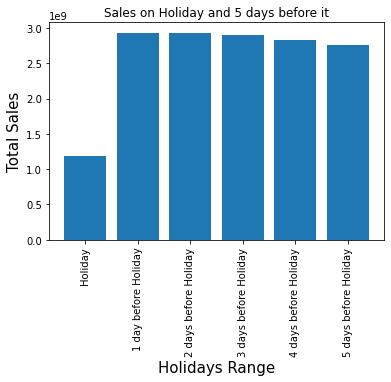

In [ ]:
Store_sales_holiday_df=Store_sales_df.loc[Store_sales_df["StateHoliday"].isin(["a","b","c"]) | Store_sales_df["SchoolHoliday"] == 1]
Store_sales_holiday_df["Date"]=Store_sales_holiday_df["Date"].dt.date
date_1_list=[]
date_2_list=[]
date_3_list=[]
date_4_list=[]
date_5_list=[]
for date_1 in Store_sales_holiday_df["Date"].unique():
  date_1_list.append(datetime.strftime(date_1 - timedelta(1), '%Y-%m-%d'))
  date_2_list.append(datetime.strftime(date_1 - timedelta(2), '%Y-%m-%d'))
  date_3_list.append(datetime.strftime(date_1 - timedelta(3), '%Y-%m-%d'))
  date_4_list.append(datetime.strftime(date_1 - timedelta(4), '%Y-%m-%d'))
  date_5_list.append(datetime.strftime(date_1 - timedelta(5), '%Y-%m-%d'))
Total_Sales=[]
Total_Sales.append(Store_sales_holiday_df["Sales"].sum())
Total_Sales.append(Store_sales_df.loc[Store_sales_df["Date"].isin(date_1_list)]["Sales"].sum())
Total_Sales.append(Store_sales_df.loc[Store_sales_df["Date"].isin(date_2_list)]["Sales"].sum())
Total_Sales.append(Store_sales_df.loc[Store_sales_df["Date"].isin(date_3_list)]["Sales"].sum())
Total_Sales.append(Store_sales_df.loc[Store_sales_df["Date"].isin(date_4_list)]["Sales"].sum())
Total_Sales.append(Store_sales_df.loc[Store_sales_df["Date"].isin(date_5_list)]["Sales"].sum())
# print("******************************************************************************************************************")
# print("Sales on Holiday and 5 days before it: "+str(Total_Sales))
# print("******************************************************************************************************************")
plt.bar([0,1,2,3,4,5],Total_Sales,width=0.8,tick_label=["Holiday","1 day before Holiday","2 days before Holiday","3 days before Holiday","4 days before Holiday","5 days before Holiday"])
plt.xticks(rotation=90)
plt.title("Sales on Holiday and 5 days before it")
plt.xlabel("Holidays Range", fontsize=15)
plt.ylabel("Total Sales", fontsize=15)
plt.show()

Cummulative Sales of All types of Holidays Graph: The below graph shows that different types of State Holidays VS their Sales

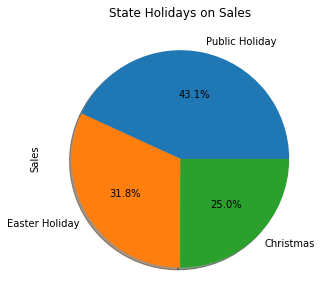

In [ ]:
Sales_in_Holidays=[]
# Store_sales_df=Store_sales_df.loc[Store_sales_df["Sales"]>0]
Sales_in_Holidays.append(Store_sales_df.loc[Store_sales_df["StateHoliday"]=="a"]["Sales"].mean())
Sales_in_Holidays.append(Store_sales_df.loc[Store_sales_df["StateHoliday"]=="b"]["Sales"].mean())
Sales_in_Holidays.append(Store_sales_df.loc[Store_sales_df["StateHoliday"]=="c"]["Sales"].mean())
# plt.bar([0,1,2],Sales_in_Holidays,width=0.8,tick_label=["a","b","c",])
total=sum(Sales_in_Holidays)
for i in range(len(Sales_in_Holidays)):
  Sales_in_Holidays[i]=Sales_in_Holidays[i]/total
df = pd.DataFrame({'Sales': Sales_in_Holidays},
                  index=['Public Holiday', 'Easter Holiday', 'Christmas'])
plot = df.plot.pie(y='Sales',title="State Holidays on Sales",legend=False,autopct='%1.1f%%', figsize=(5, 5),shadow=True, startangle=0)

**Observation:**  From the graph we can clearly see that Public Holidays has more sales than sales on other types of holidays.

## **Section 3: Most and Least selling stores**


From the below code we can clearly see that all stores have atleast 6 months of data

In [ ]:
# Store_sales_df['6month'] = 
Store_sales_date_df = Store_sales_df[["Store","Date","Sales"]].groupby(["Store"]).agg(Minimum_Date=('Date', np.min), Maximum_Date=('Date', np.max))
Store_sales_date_df['months']= (pd.np.ceil((Store_sales_date_df["Maximum_Date"]-pd.Timedelta(days=1)-Store_sales_date_df['Minimum_Date'])/pd.np.timedelta64(1, 'M')).astype(int))
Store_sales_date_df = Store_sales_date_df[(Store_sales_date_df['months'] >= 6)]
Store_sales_date_df

,Minimum_Date,Maximum_Date,months
Store,,,
1,2013-01-01,2015-07-31,31
2,2013-01-01,2015-07-31,31
3,2013-01-01,2015-07-31,31
4,2013-01-01,2015-07-31,31
5,2013-01-01,2015-07-31,31
...,...,...,...
1111,2013-01-01,2015-07-31,31
1112,2013-01-01,2015-07-31,31
1113,2013-01-01,2015-07-31,31


The five stores with the Highest cumulative sales:


In [ ]:
Store_sales_df[["Store","Sales"]].groupby(["Store"]).sum().sort_values("Sales").head(5)

,Sales
Store,
307,2114322
543,2179287
198,2268273
208,2302052
263,2306075


The five stores with the least cumulative sales:

In [ ]:
Store_sales_df[["Store","Sales"]].groupby(["Store"]).sum().sort_values("Sales").tail(5)

,Sales
Store,
251,14896870
1114,16202585
562,16927322
817,17057867
262,19516842


Below is the graph for finding patterns between top 5 stores sales across all Weeks in an year. I have considered sum of all sales across top 5 stores per week. 

<function matplotlib.pyplot.show>

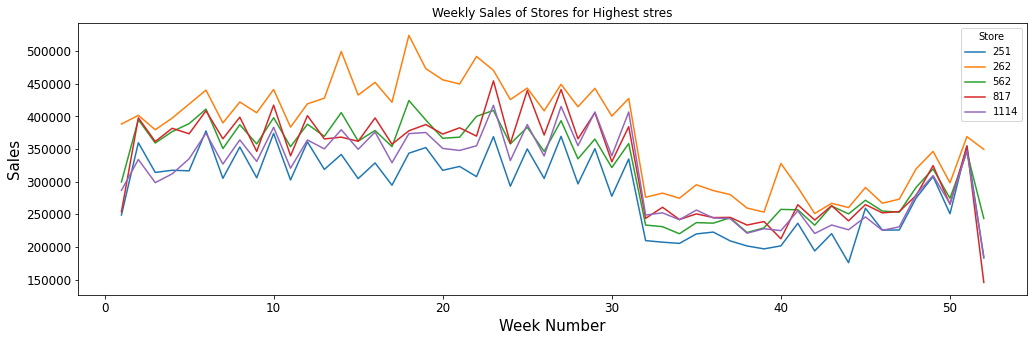

In [ ]:
Store_id_highest5=Store_sales_df[["Store","Sales"]].groupby(["Store"]).sum().sort_values("Sales").tail(5).index.values
Store_sales_df["Week_Number"]=Store_sales_df['Date'].dt.week
Store_sales_top5_df_pivot = Store_sales_df.loc[Store_sales_df["Store"].isin(Store_id_highest5)][["Store","Week_Number","Sales"]].groupby(["Store","Week_Number"]).sum().reset_index(level=['Store', 'Week_Number'])
Store_sales_top5_df_pivot = Store_sales_top5_df_pivot.pivot_table('Sales', ['Week_Number'], 'Store')
Store_sales_top5_df_pivot.groupby('Week_Number').mean().plot(figsize=(17,5), fontsize=12, title='Weekly Sales of Stores for Highest stres')
plt.ylabel("Sales", fontsize=15)
plt.xlabel("Week Number", fontsize=15)
plt.show

**Observation:** From the above graph we can see that Highest sales store 262 with orange line is at the top of graph and remaining lines are stacked below it. There is a common drop of sales traend across all stores which happends post 30th week of the year



Below is the graph for finding patterns between top 5 stores sales across all Weeks in an year. I have considered sum of all sales across top 5 stores per week. 

Text(0.5, 0, 'Week Number')

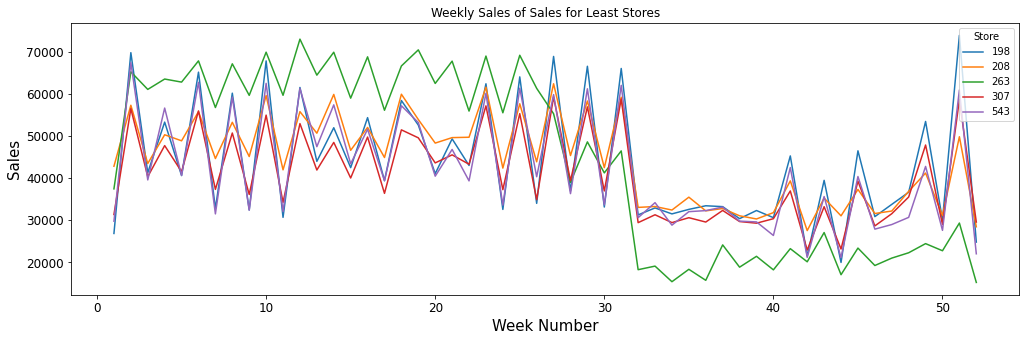

In [ ]:
Store_id_least5=Store_sales_df[["Store","Sales"]].groupby(["Store"]).sum().sort_values("Sales").head(5).index.values
Store_sales_df["Week_Number"]=Store_sales_df['Date'].dt.week
Store_sales_least5_df = Store_sales_df.loc[Store_sales_df["Store"].isin(Store_id_least5)][["Store","Week_Number","Sales"]].groupby(["Store","Week_Number"]).sum().reset_index(level=['Store', 'Week_Number']).sort_values("Sales")
Store_sales_least5_df = Store_sales_least5_df.pivot_table('Sales', ['Week_Number'], 'Store')
Store_sales_least5_df.groupby('Week_Number').mean().plot(figsize=(17,5), fontsize=12, title='Weekly Sales of Sales for Least Stores')
plt.ylabel("Sales", fontsize=15)
plt.xlabel("Week Number", fontsize=15)

**Observation:** From the above graph we can see that bottom 5 store sales follow same trend and are having lines overlapped except 263 store which showed exceptional sales till 30th week and then droped more when compared to other stores. There is a common drop of sales traend across all stores which happends post 30th week of the year.

Below is the graph which compares Top 5 and Bottom 5 stores Weekly sales across a year.

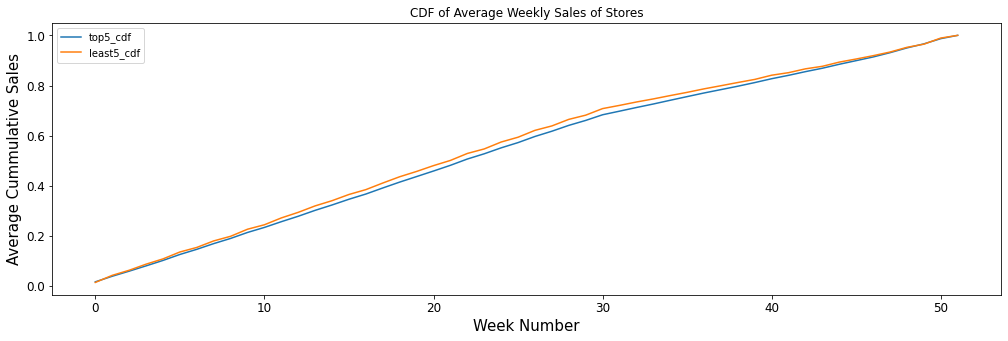

In [ ]:
Store_sales_least5_cum_df =Store_sales_least5_df.groupby('Week_Number').sum()
Store_sales_least5_cum_df["col_mean"]=Store_sales_least5_cum_df.mean(axis=1, skipna=True)
Store_sales_top5_cum_df =Store_sales_top5_df_pivot.groupby('Week_Number').sum()
Store_sales_top5_cum_df["col_mean"]=Store_sales_top5_cum_df.mean(axis=1, skipna=True)
compare_top5_least5_df=pd.DataFrame()
compare_top5_least5_df["least5_sum"]=Store_sales_least5_cum_df["col_mean"]/ sum(Store_sales_least5_cum_df['col_mean'])
compare_top5_least5_df["least5_cdf"]=compare_top5_least5_df["least5_sum"].cumsum()
compare_top5_least5_df["top5_sum"]=Store_sales_top5_cum_df["col_mean"]/ sum(Store_sales_top5_cum_df['col_mean'])
compare_top5_least5_df["top5_cdf"] = compare_top5_least5_df["top5_sum"].cumsum()
compare_top5_least5_df = compare_top5_least5_df.reset_index(level='Week_Number')
compare_top5_least5_df[["top5_cdf","least5_cdf"]].plot(figsize=(17,5), fontsize=12, title='CDF of Average Weekly Sales of Stores')
plt.ylabel("Average Cummulative Sales", fontsize=15)
plt.xlabel("Week Number", fontsize=15)
plt.show()

**Observations:**

From the above three visualisations, I can conclude the following observations:
1. Sales in the top performing stores almost follows a similar pattern. They peak and fall at the same time.

2. Sales in the bottom performing stores almost follows a similar pattern as top performing stores i.e., They peak and fall at the same time.

3. I observed that, for both top and bottom performing stores, after week 30 the sales tend to decrease slowly. I wonder what might be the reason.
4. The final plot reveals the collective performance of the Top stores vs Bottom stores. Basically, this graph is just a smoothened out version of the above discussed trends.

## **Section 4: Closest Competitor: Distance and Age**

**Effect of Distance of the closest competitor on Sales**

We generall know that if there is competitor near by then sales decrease. Lets find if the same happens to the given dataset.

We need to consider stroes or sales data which is greater than Competition start date because the data before that just causes skewing of some of the conditions.

In [ ]:
Store_sales_df = Store_sales_df.dropna(subset=['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'])
Store_sales_df["CompetitionOpenSinceMonth"] = Store_sales_df["CompetitionOpenSinceMonth"].astype(int)
Store_sales_df["CompetitionOpenSinceYear"] = Store_sales_df["CompetitionOpenSinceYear"].astype(int)
Store_sales_df["DateMonthYear"]=Store_sales_df.Date.apply(lambda x: int(x.strftime("%Y%m")))
Store_sales_df["CompetitionOpenSinceMonthYear"] = Store_sales_df[["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]].apply(lambda x : int(str(x[1])+str(x[0])) if x[0]>=10 else int(str(x[1])+"0"+str(x[0])) , axis=1)
Store_sales_df = Store_sales_df.loc[Store_sales_df["DateMonthYear"]>=Store_sales_df["CompetitionOpenSinceMonthYear"]]

We have removed data that does not contain competition and row have date less than Competition Open Since date( only month and year)

In [ ]:
percentile_25=Store_sales_df["CompetitionDistance"].quantile(0.25)
percentile_5=Store_sales_df["CompetitionDistance"].quantile(0.5)
percentile_75=Store_sales_df["CompetitionDistance"].quantile(0.75)
def foo(val):
  if 0<=val<percentile_25:
    return "Very Close"
  elif percentile_25<=val<percentile_5:
    return "Close"
  elif percentile_5<=val<percentile_75:
    return "Far"
  else:
    return "Very Far"
Store_sales_df["Relative_Distance"]=Store_sales_df.apply(lambda x: foo(x["CompetitionDistance"]),axis=1)

I have created a column named "Relative_Distance" of type catogory. If a value falls under 25 percentiale then Competition store is very close. Similarly for other parameter are below for the newly created column:


1.   Very Close: less than 25th percentile.
2.   Close: between 25th and 50th percentile.
3.   Far: between 50th and 75th percentile.
4.   Very Close: greater than 75th.




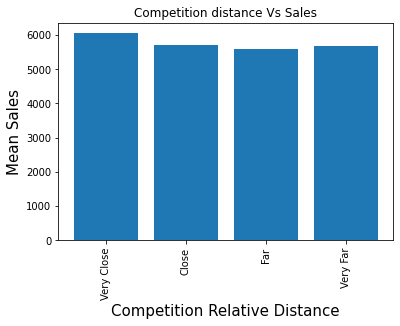

In [ ]:
Very_Close_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Very Close"]["Sales"].mean()
Close_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Close"]["Sales"].mean()
Far_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Far"]["Sales"].mean()
Very_Far_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Very Far"]["Sales"].mean()

plt.bar([0,1,2,3],[Very_Close_Competition,Close_Competition,Far_Competition,Very_Far_Competition],width=0.8,tick_label=["Very Close","Close","Far","Very Far"])
plt.xticks(rotation=90)
plt.title("Competition distance Vs Sales")
plt.ylabel("Mean Sales", fontsize=15)
plt.xlabel("Competition Relative Distance", fontsize=15)
plt.show()



I have considerd a bar plot to check the mean values of sales for "Relative_Distance" column. We can see that there is no significant relation between distance and sales. This I have considered a Box Plot to find a relation.

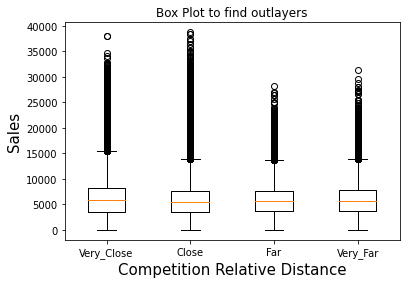

In [ ]:
Very_Close_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Very Close"]["Sales"]
Close_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Close"]["Sales"]
Far_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Far"]["Sales"]
Very_Far_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Very Far"]["Sales"]

columns=[Very_Close_Competition,Close_Competition,Far_Competition,Very_Far_Competition]

fig, ax = plt.subplots()
ax.boxplot(columns)
ax.set_xticklabels(["Very_Close","Close","Far","Very_Far"])
plt.title("Box Plot to find outlayers")
plt.ylabel("Sales", fontsize=15)
plt.xlabel("Competition Relative Distance", fontsize=15)
plt.show()

To investigate futher details of no corealtion between the sales and compitition distance, I have done futher analysis by ploting a blogspot and finding the reason for the missmaping. We can see that there are many outliers in the data set which effect the 

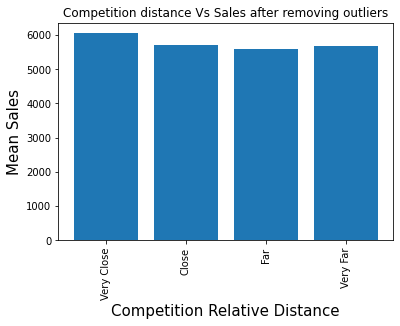

In [ ]:
Sales_90_percentile = Store_sales_df["Sales"].quantile(0.95)

Very_Close_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Very Close"]["Sales"].mean()
Close_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Close"]["Sales"].mean()
Far_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Far"]["Sales"].mean()
Very_Far_Competition = Store_sales_df.loc[Store_sales_df["Relative_Distance"]=="Very Far"]["Sales"].mean()

plt.bar([0,1,2,3],[Very_Close_Competition,Close_Competition,Far_Competition,Very_Far_Competition],width=0.8,tick_label=["Very Close","Close","Far","Very Far"])
plt.xticks(rotation=90)
plt.title("Competition distance Vs Sales after removing outliers")
plt.ylabel("Mean Sales", fontsize=15)
plt.xlabel("Competition Relative Distance", fontsize=15)
plt.show()

**Observation:**   I have considered only 95 percentile of data, a the outliers are getting removed. But from the graph we can clearly see that there is no major difference in mean sales across the stores depending on the didtance of the compititor. From this observation we can interprit that the distance of compititor does not effect the sales of the store. Both the columns are not correlated.



**Effect of Competition over time on Sales. ( Before Competition, During Competition & after sometime of Competition store established)**

I have observed many null values in data for columns like "CompetitionOpenSinceMonth" & "CompetitionOpenSinceYear" which are not needed for the current comparision

In [ ]:
# Removing null Values
Store_sales_df = Store_sales_df.dropna(subset=['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'])
Store_sales_df["CompetitionOpenSinceMonth"] = Store_sales_df["CompetitionOpenSinceMonth"].astype(int)
Store_sales_df["CompetitionOpenSinceYear"] = Store_sales_df["CompetitionOpenSinceYear"].astype(int)

# Adding new column for current date and CompetitionOpenSince having only month and year
Store_sales_df["DateMonthYear"]=Store_sales_df.Date.apply(lambda x: int(x.strftime("%Y%m")))
Store_sales_df["CompetitionOpenSinceMonthYear"] = Store_sales_df[["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]].apply(lambda x : int(str(x[1])+str(x[0])) if x[0]>=10 else int(str(x[1])+"0"+str(x[0])) , axis=1)
Store_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Week_Number,DateMonthYear,CompetitionOpenSinceMonthYear,Relative_Distance
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,NaN,NaN,NaN,31,201507,200809,Close
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,201507,200711,Very Close
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,201507,200612,Very Far
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,NaN,NaN,NaN,31,201507,200909,Very Close
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,NaN,NaN,NaN,31,201507,201504,Very Far


## **Section 5: Pearson Correlation of Features**

Finding correlation between any two columns first we need to convert them into integers or float values as the heatmap does not show the correaltion between two columns. All the non integer columns shows blank colors in the heatmap.

I have considered a quicker and easier approach of making effective conversion of object type columns into integer values. I have used .cat.code to convert object values into integers. This attribute gives values ranging from 0 to n based on the frequency of the object occrued, this more frequency object will have higher integer value, thus not effecting the column.

The Interesting features that I have considered are as below:

1.   Sales: This is a complusary column given by professor. 
2.   CompetitionDistance: Sometimes Competition can cause effect on sales, thus it will be interesting to see how both are related.
3.   Open: If shop is open it is general notion that sales must increase.
4.   Customers: The number of customers and holidays will be interesting to look into.
5.   Promo: General trend of sales follows Promos. typically both are positively related. We can confirm the same by doing correlation between them.
6.   Assortment: The range of varities in store matter a lot, as the owner can get insites of which new range(stock size) store to open based on sales in each Assortment.
7.  StoreType: The type of store also matter a lot, as the owner can get insites of which new type of store to open based on sales in each StoreType.



In [ ]:
Store_sales_df.dtypes

Store                                     int64
DayOfWeek                                 int64
Date                             datetime64[ns]
Sales                                     int64
Customers                                 int64
Open                                      int64
Promo                                     int64
StateHoliday                             object
SchoolHoliday                             int64
StoreType                                object
Assortment                               object
CompetitionDistance                     float64
CompetitionOpenSinceMonth                 int64
CompetitionOpenSinceYear                  int64
Promo2                                    int64
Promo2SinceWeek                         float64
Promo2SinceYear                         float64
PromoInterval                            object
Week_Number                               int64
DateMonthYear                             int64
CompetitionOpenSinceMonthYear           

From the datatypes of the dataframe we can see that there are many columns as object data type. So converting only few till it is needed for columns considered for correlation.

In [ ]:
Store_sales_df_heatmap=Store_sales_df.dropna()
Store_sales_df["Assortment_cat"] = Store_sales_df["Assortment"].astype('category')
Store_sales_df["StoreType_cat"] = Store_sales_df["StoreType"].astype('category')
Store_sales_df["Assortment_cat_code"] = Store_sales_df["Assortment_cat"].cat.codes
Store_sales_df["StoreType_cat_code"] = Store_sales_df["StoreType_cat"].cat.codes
Store_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Week_Number,DateMonthYear,CompetitionOpenSinceMonthYear,Relative_Distance,Assortment_cat,StoreType_cat,Assortment_cat_code,StoreType_cat_code
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,NaN,NaN,NaN,31,201507,200809,Close,a,c,0,2
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,201507,200711,Very Close,a,a,0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,201507,200612,Very Far,a,a,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,NaN,NaN,NaN,31,201507,200909,Very Close,c,c,2,2
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,NaN,NaN,NaN,31,201507,201504,Very Far,a,a,0,0


We have converted our desired object columns into numeric values, now we need to perform correlation between all the selected columns and plot a heat map to find most coorelated columns.

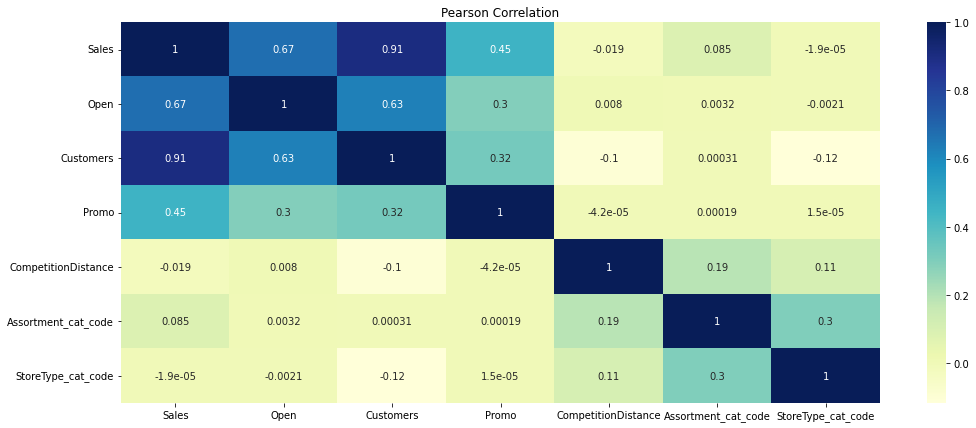

In [ ]:
columns=["Sales","Open","Customers","Promo","CompetitionDistance","Assortment_cat_code","StoreType_cat_code"]
Store_sales_df_heatmap=Store_sales_df[columns].corr(method='pearson')
plt.figure(figsize=(17,7))
ax = sns.heatmap(Store_sales_df_heatmap,yticklabels = columns, xticklabels = columns,annot=True,cmap="YlGnBu").set(title='Pearson Correlation')

From the Heatmap we can determine few columns with string correlation:
1.  Sales & Customer: This is a positive correlation as when the number of customer increases the sales increases.
2.  Sales & Promo: The notion of increase in sales due to Promos is true, thus having positive correlation between two columns.
3.  SchoolHoliday & Assortment: There is a slight positive correlation between school holidays and assortment. There might be scenario where people during school holidays might shop more in some store with a specific assortment.
4.  StoreType & Assortment: Type of store and Assortment also have a significant negative correlation. This might be due to a fact that Store type can determine Assortment of the store.

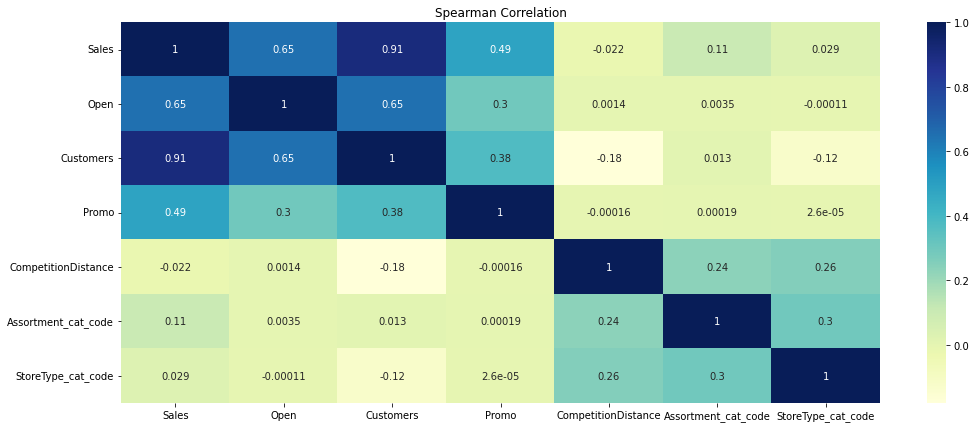

In [ ]:
columns=["Sales","Open","Customers","Promo","CompetitionDistance","Assortment_cat_code","StoreType_cat_code"]
Store_sales_df_heatmap=Store_sales_df[columns].corr(method='spearman')
plt.figure(figsize=(17,7))
ax = sns.heatmap(Store_sales_df_heatmap,yticklabels = columns, xticklabels = columns,annot=True,cmap="YlGnBu").set(title='Spearman Correlation')

The heatmap for Spearman Correlation has added a new touple with postive correlation. Below are the details:
1.  Competition Disatnce & StoreType: There is increase in positive correlation bewteen the columns than compared to pearson correlation. 

## **Section 6: Permutation Testing**

From the question we need to apply log to the sales column. This is beacuse the sales have huge range of data and perm_scores are less, thus we cant determine if the feature is relavent and needed in the below models.

I have removed all sales values which are having zero values. Applying log on zeros will give us not defined values and we can't train sigle linear regression model with NaN values.

In [ ]:
# Cleaning of zeros in sales
# Store_sales_df['CompetitionDistance'] = Store_sales_df['CompetitionDistance'].fillna(Store_sales_df['CompetitionDistance'].median())
Store_sales_df_p_test=Store_sales_df.loc[Store_sales_df['Sales']>0]
Store_sales_df_p_test["Sales_log"] = np.log2(Store_sales_df_p_test['Sales'])

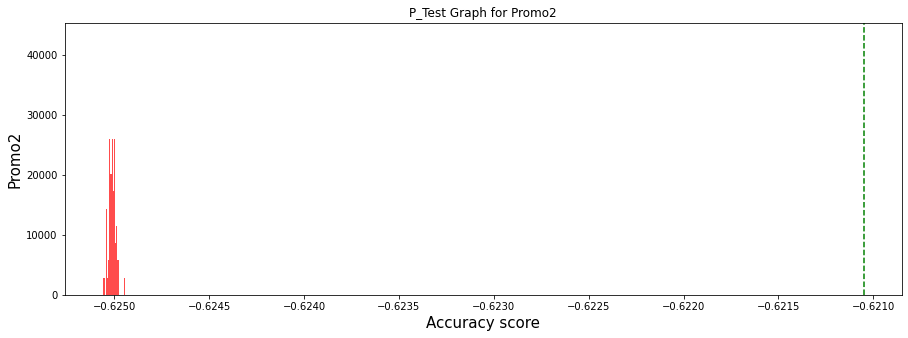

Promo2 P_value :0.006622516556291391


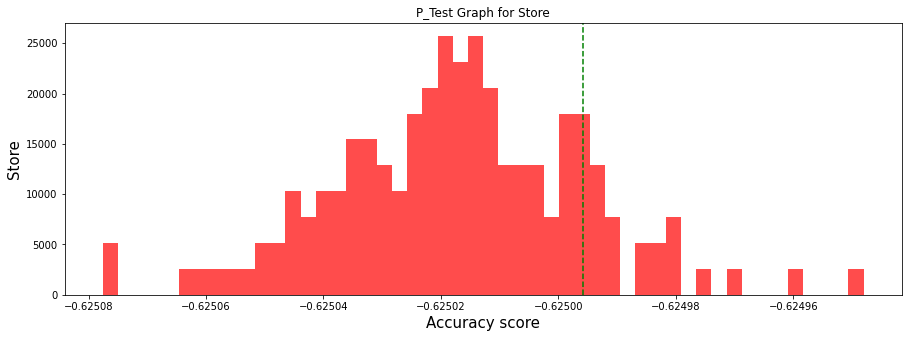

Store P_value :0.152317880794702


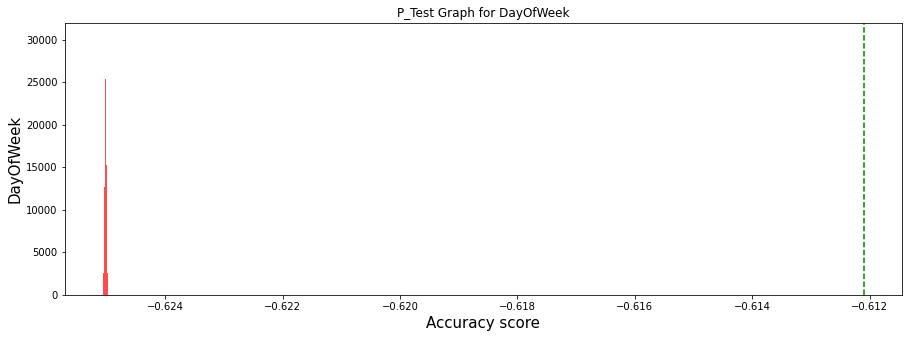

DayOfWeek P_value :0.006622516556291391


In [ ]:
features=["Promo2","Store","DayOfWeek"]
for feature in features:
  x = np.array(Store_sales_df_p_test[[feature]])
  y = np.array(Store_sales_df_p_test.Sales_log.values)
  length = Store_sales_df_p_test.shape
  x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.1, random_state=0)
  model = LinearRegression().fit(x_train, y_train)
  r_sq = model.score(x_train, y_train)
  score, perm_scores, p_value = permutation_test_score(model,x_test,y_test, scoring="neg_root_mean_squared_error", n_permutations=150)
  fig, ax = plt.subplots(figsize=(15,5))
  n, bins, patches = ax.hist(perm_scores,bins=50,density = 1, color ='red', alpha = 0.7)
  stri='P_Test Graph for '+str(feature)
  ax.set_title(stri)
  ax.axvline(x=score,ls="--", color="g")
  ax.set_xlabel("Accuracy score", fontsize=15)
  _ = ax.set_ylabel(feature, fontsize=15)
  plt.show()
  print(feature+" P_value :"+str(p_value))

**Observation:** I have considered Promo2 as good feature, Store column (contains only store ids ) as bad feature and DayofWeek as random feature. From the p_values and the Permutation graph I have below:


1.   Promo2 (Good Feature):I have considered Promo2 is good feature because from above graphs we can conclude that it has more effect on sales. I got a low p_value saying that it is good feature to consider. From the graph also we can see that the score value is also away from the permitation scores. 
2.   Store (Bad Feature): I have considered Store as bad feature because it just contians store IDs and that does not given any meaning full information in linear regression. We also got higher p_value and score lies in the permitation scores which indicates that store column gives sales values based on random probability.
3.   DayofWeek (Ramdom) :  From the random feature we can observe that it is having a good p_value thus it is a good feature and have a good contribution in predicting sales.



## **Section 7: Interesting findings**

**Interesting Finding 1:-**  When we talk about Sales, we analyse them in many ways. One of the interesting and general way to do is to find sales happening over a mmonth. So I have taken frequency and sum of sales happening over a month on the entire data set.

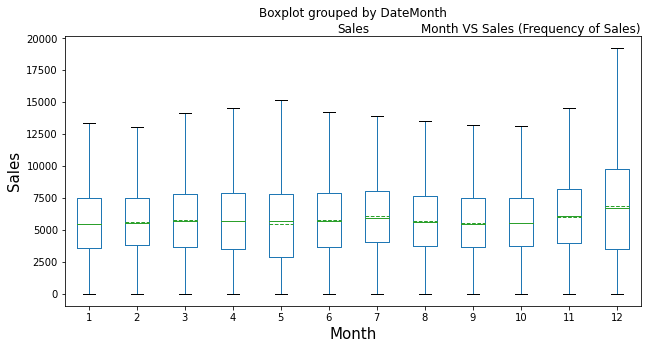

Text(0.5, 1.0, 'Sales Vs Months (Sum of Sales)')

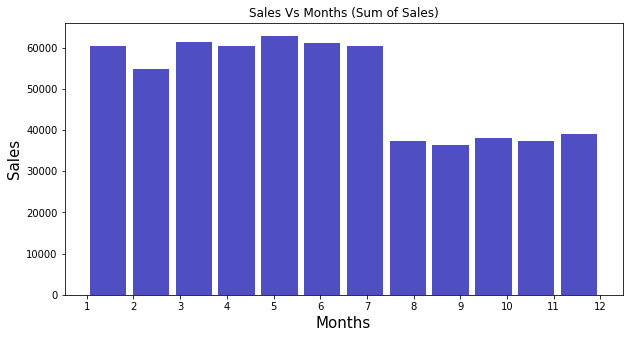

In [ ]:
# Getting month and year values from date column.
Store_sales_df['DateYear'] = Store_sales_df['Date'].dt.year.dropna()
Store_sales_df['DateMonth'] = Store_sales_df['Date'].dt.month.dropna()

# Ploting a boxplot on sales on grouping DateMonth
Store_sales_df.boxplot(column='Sales', by='DateMonth',grid=False,showfliers=False,showmeans=True,meanline=True,figsize=(10,5))
plt.title('Month VS Sales (Frequency of Sales)', fontdict=None, loc='right', pad=1)
plt.ylabel("Sales",fontsize=15)
plt.xlabel("Month",fontsize=15)
plt.show()

# Calulating total sum of sales on grouping DateMonth
Store_sales_df["DateMonth"].plot.hist(grid=True, bins=12, rwidth=0.85,color='#0504aa',alpha=0.7,figsize=(10,5))
plt.grid(b=False)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(Store_sales_df["DateMonth"].unique())
plt.title('Sales Vs Months (Sum of Sales)')

**Observation:-** By the 1st graphs we can cleary understand that December(12th) month has more stores and days with high sales while compared to all other months in the year. That means that there as customers who are outliers and increasing the range of sales across the stores. 
From the above hypothesis we can assume that there will be more cummulative sales in 12th month. But from the 2nd graph we can see that total sales is more in 1st month. 
Thus we can assume that more customers shop low value products in 1st month of the year and less customers buy high value products in 12th month of the year.

**Interesting Finding 2:-** When we calculate sales over a month and comapred across all months, then its obvious that we will discuss sales over years. Below are the sales analysis over 2013 and 2014.

Text(0.5, 20.80000000000002, 'Months')

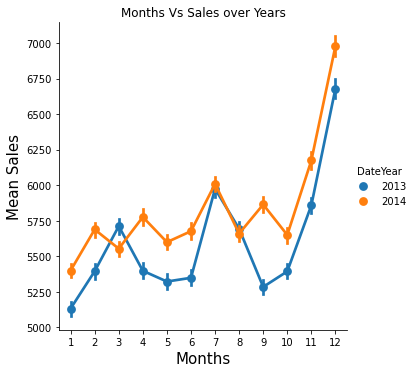

In [ ]:
Store_sales_df['DateYear'] = Store_sales_df['Date'].dt.year.dropna()
Store_sales_df['DateMonth'] = Store_sales_df['Date'].dt.month.dropna()
Store_sales_df_year=Store_sales_df.loc[Store_sales_df['DateYear'].isin([2014,2013])]
sns.factorplot(x ='DateMonth', y ='Sales', hue = 'DateYear', data = Store_sales_df_year)
plt.title("Months Vs Sales over Years")
plt.ylabel("Mean Sales", fontsize=15)
plt.xlabel("Months", fontsize=15)

**Observation:-** From the graph we can say that in year 2014 has more sales than year 2013 across most of all months.

**Interesting Finding 3:-**  I have seen 2 column names as Promo and Promo2. We can see can interesting plot when we compare Promos over customers. Below is a scatter plot on Promo, Promo2 and customers.

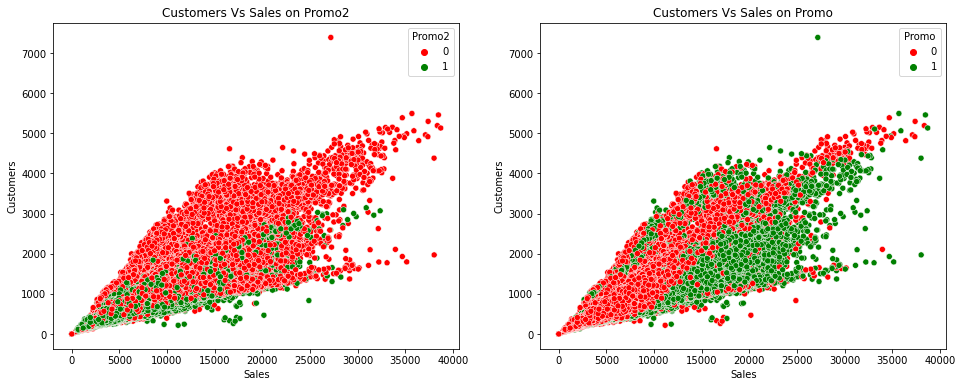

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.scatterplot(Store_sales_df.Sales, Store_sales_df.Customers, hue=Store_sales_df.Promo2,palette=['red','green'], ax=ax1).set(title="Customers Vs Sales on Promo2")
sns.scatterplot(Store_sales_df.Sales, Store_sales_df.Customers, hue=Store_sales_df.Promo,palette=['red','green'], ax=ax2).set(title="Customers Vs Sales on Promo")
plt.show()

**Observation:** There are 2 differnt graphs given above, describing about promo2 and promo effects on sales and customers. From the first sub plot we can conclude that sales and customers are incresing when there is no promo2. from the second sub plot we can conclude that when promo is active then sales and customers are increasing. Thus we can draw a conclusion that promo and more effect on increasing customers and sales than promo2.

**Interesting Finding 4:-**  We have seen plots done on month & year. Now there is an intersting finding in sales per week.

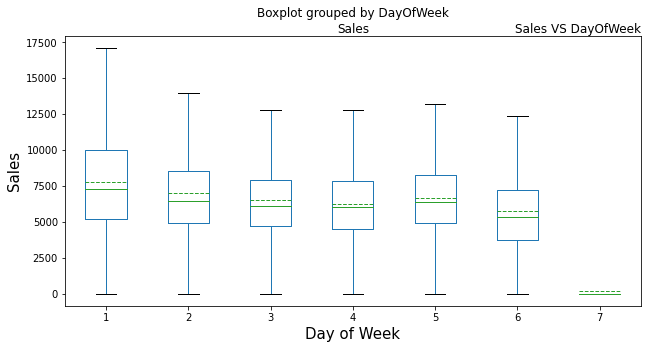

In [ ]:
Store_sales_df["Sales"].dropna(inplace=True)
Store_sales_df["DayOfWeek"].dropna(inplace=True)
Store_sales_df.boxplot(column='Sales', by='DayOfWeek',grid=False,showfliers=False,showmeans=True,meanline=True,figsize=(10,5))
plt.title('Sales VS DayOfWeek', fontdict=None, loc='right', pad=1)
plt.ylabel("Sales", fontsize=15)
plt.xlabel("Day of Week", fontsize=15)
plt.show()

**Observation:** We can see that there is no sales on sunday. As there is no sales on sunday thus there is an increase in sales on monday.

**Interesting Finding 5:-**  From the promos graph on customers and sales, We can also find another interesting finding. We can compare which promo has more effect on sales.

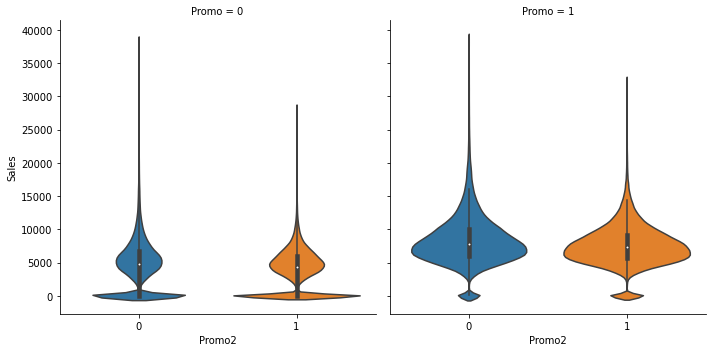

In [ ]:
sns.factorplot(col='Promo',x='Promo2',y='Sales',data=Store_sales_df,kind='violin')

**Observation:** From the graph, we mainly have to focus on the area of the violen. We can see that from first subplot there is not significant change in area. Also there is no significant change in area from second sub plot. But there is an interesting catch, The area of two sub plots are having a large diffference, that means that Promo is having huge impact on sales. There is no impact from promo and promo2 on sales.

**What happened to the average sales of a store over time when competition started?**

I have observed that the average sales for store_id = 6 has decreased dramatically since it's competition has opened shop!

Let's see how far this is true with the data.

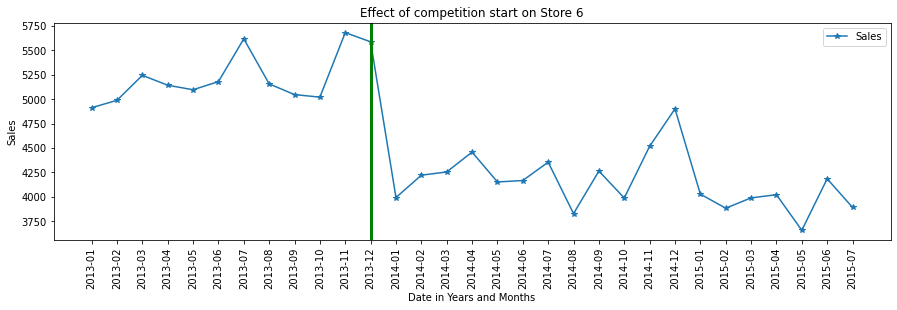

In [ ]:
store_id = 6
store_data = merged_df[Store_sales_df["Store"] == store_id]


average_store_sales = store_data.groupby('year_month')["Sales"].mean()

year_competition_started = store_df["CompetitionOpenSinceYear"].loc[store_df["Store"]  == store_id].values[0]
month_competition_started = store_df["CompetitionOpenSinceMonth"].loc[store_df["Store"] == store_id].values[0]

ax = average_store_sales.plot(legend=True,figsize=(15,4),marker='*')
ax.set_xticks(range(len(average_store_sales)))
ax.set_xticklabels(average_store_sales.index.tolist(), rotation=90)


if year_competition_started >= 2013:
    plt.axvline(x=((year_competition_started-2013) * 12) + (month_competition_started - 1), linewidth=3, color='green')

plt.xlabel('Date in Years and Months')
plt.ylabel('Sales')
plt.title('Effect of competition start on Store 6')
plt.show()


From the above graph, I was able to observe

1. Till 2013-12 (December, 2013), store with id=6 was riding high on sales.
2. This was the time, when it's competitor opens.
3. After that point, Store with id=6 has seen drastic decrease in it's sales.
4. It was able to catch pace only after about an year(December, 2014).

## **Section 8: Train Test Split and Modelling**

For Training any model we need to clean the data. Now lets look at the data and find all the columns with null or nan values

In [ ]:
Store_sales_df.isna().sum()

Store                                 0
DayOfWeek                             0
Date                                  0
Sales                                 0
Customers                             0
Open                                  0
Promo                                 0
StateHoliday                          0
SchoolHoliday                         0
StoreType                             0
Assortment                            0
CompetitionDistance                   0
CompetitionOpenSinceMonth             0
CompetitionOpenSinceYear              0
Promo2                                0
Promo2SinceWeek                  319547
Promo2SinceYear                  319547
PromoInterval                    319547
Week_Number                           0
DateMonthYear                         0
CompetitionOpenSinceMonthYear         0
Relative_Distance                     0
Assortment_cat                        0
StoreType_cat                         0
Assortment_cat_code                   0


We can see that some columns have null data and also if we observer the test data does not contain some columns. Lets load the data from test and perfrom cleaning simultaniously. This will help us perform cleaning of data only once at one dataframe.

Loading data from test.csv and observing data. 

In [ ]:
test_df = pd.read_csv('test.csv')
# train_df['Date'] = pd.to_datetime(train_df['Date'], format='%Y-%m-%d')
print(test_df.shape)
test_df.head()

(41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


We can observe that there is no sales column in test and having ID column, so I separated ID for later use. Now we need to merge test data with store dataframe for cleaning.

In [ ]:
Store_sales_df_test=pd.merge(test_df,store_df, on='Store', how='left')
print(Store_sales_df_test.shape)
Output_predict = {'Id': Store_sales_df_test['Id']}
Store_sales_df_test_1 = Store_sales_df_test[["Store","DayOfWeek","Date","Open","Promo","StateHoliday","SchoolHoliday","StoreType","Assortment","CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2"]]
Store_sales_df_test_1["train"]=0
Store_sales_df_test_1["Sales"]=0
Store_sales_df_test_1.head()

(41088, 17)


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,train,Sales
0,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0,0
1,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,0,0
2,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0,0
3,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0,0
4,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0,0


From the first cell we can see that "Promo2SinceWeek","Promo2SinceYear" columns are having 50% null values, so we can drop the columns. If we fill the columns with values this will impact the predictions.

In [ ]:
Store_sales_df_train=Store_sales_df[["Store","Sales","DayOfWeek","Date","Open","Promo","StateHoliday","SchoolHoliday","StoreType","Assortment","CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2"]]
Store_sales_df_train["train"]=1
Store_sales_df_train.head()

,Store,Sales,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,train
0,1,5263,5,2015-07-31,1,1,0,1,c,a,1270.0,9,2008,0,1
1,2,6064,5,2015-07-31,1,1,0,1,a,a,570.0,11,2007,1,1
2,3,8314,5,2015-07-31,1,1,0,1,a,a,14130.0,12,2006,1,1
3,4,13995,5,2015-07-31,1,1,0,1,c,c,620.0,9,2009,0,1
4,5,4822,5,2015-07-31,1,1,0,1,a,a,29910.0,4,2015,0,1


Now I am concating the test and train data from train.csv and train.csv, then performing cleaning and featuring engineering simultaniously.

In [ ]:
frames = [Store_sales_df_train, Store_sales_df_test_1]
Store_sales_df_total = pd.concat(frames)
Store_sales_df_total.head()

,Store,Sales,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,train
0,1,5263,5,2015-07-31 00:00:00,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,1
1,2,6064,5,2015-07-31 00:00:00,1.0,1,0,1,a,a,570.0,11.0,2007.0,1,1
2,3,8314,5,2015-07-31 00:00:00,1.0,1,0,1,a,a,14130.0,12.0,2006.0,1,1
3,4,13995,5,2015-07-31 00:00:00,1.0,1,0,1,c,c,620.0,9.0,2009.0,0,1
4,5,4822,5,2015-07-31 00:00:00,1.0,1,0,1,a,a,29910.0,4.0,2015.0,0,1


In [ ]:
Store_sales_df_total.tail()

,Store,Sales,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,train
41083,1111,0,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,0
41084,1112,0,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,0
41085,1113,0,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,0
41086,1114,0,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,0
41087,1115,0,6,2015-08-01,1.0,0,0,1,d,c,5350.0,NaN,NaN,1,0


**Cleaning 1:** Date is an important feature, To preserve the feature, I am converting date into interger feature by dividing into 3 new columns, date day, date month and date year.

In [ ]:
Store_sales_df_total['Date'] = pd.to_datetime(Store_sales_df_total['Date'], format='%Y-%m-%d')

In [ ]:
Store_sales_df_total['DateYear'] = Store_sales_df_total['Date'].dt.year.dropna()
Store_sales_df_total['DateMonth'] = Store_sales_df_total['Date'].dt.month.dropna()
Store_sales_df_total['DateDay'] = Store_sales_df_total['Date'].dt.day.dropna()

**Cleaning 2 & 3:** For filling null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns, I am considering data from Date column because the series of time in the data is small and there is no much effect. For CompetitionDistance and open I have filled with median values because it has a best effect on models.

In [ ]:
Store_sales_df_total["CompetitionOpenSinceMonth"].fillna(Store_sales_df_total["DateMonth"], inplace=True)
Store_sales_df_total["CompetitionOpenSinceYear"].fillna(Store_sales_df_total["DateYear"], inplace=True)
Store_sales_df_total["CompetitionDistance"].fillna(Store_sales_df_total["CompetitionDistance"].median(),inplace=True)
Store_sales_df_total["Open"].fillna(Store_sales_df_total["Open"].median(),inplace=True)

In [ ]:
Store_sales_df_total["CompetitionOpenSinceMonth"]=Store_sales_df_total["CompetitionOpenSinceMonth"].astype(int)
Store_sales_df_total["CompetitionOpenSinceYear"]=Store_sales_df_total["CompetitionOpenSinceYear"].astype(int)
Store_sales_df_total["CompetitionDistance"]=Store_sales_df_total["CompetitionDistance"].astype(int)
Store_sales_df_total["Open"]=Store_sales_df_total["Open"].astype(int)

In [ ]:
Store_sales_df_total.dtypes

Store                                 int64
Sales                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
train                                 int64
DateYear                              int64
DateMonth                             int64
DateDay                               int64
dtype: object

**Cleaning 4:** From the below cell we can observe that for state object there is string 0 and int 0. We need to change it into string 0.

In [ ]:
print("StateHoliday")
print(Store_sales_df_total["StateHoliday"].unique())
print("StoreType")
print(Store_sales_df_total["StoreType"].unique())
print("Assortment")
print(Store_sales_df_total["Assortment"].unique())

StateHoliday
['0' 'a' 'b' 'c' 0]
StoreType
['c' 'a' 'd' 'b']
Assortment
['a' 'c' 'b']


In [ ]:
Store_sales_df_total["StateHoliday"]=Store_sales_df_total["StateHoliday"].apply(lambda x: '0' if x==0 else x)

In [ ]:
print("StateHoliday")
print(Store_sales_df_total["StateHoliday"].unique())

StateHoliday
['0' 'a' 'b' 'c']


In [ ]:
Store_sales_df_total=pd.get_dummies(Store_sales_df_total,columns=["StateHoliday","StoreType","Assortment"])

In [ ]:
Store_sales_df_total.head()

,Store,Sales,DayOfWeek,Date,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,train,DateYear,DateMonth,DateDay,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5263,5,2015-07-31,1,1,1,1270,9,2008,0,1,2015,7,31,1,0,0,0,0,0,1,0,1,0,0
1,2,6064,5,2015-07-31,1,1,1,570,11,2007,1,1,2015,7,31,1,0,0,0,1,0,0,0,1,0,0
2,3,8314,5,2015-07-31,1,1,1,14130,12,2006,1,1,2015,7,31,1,0,0,0,1,0,0,0,1,0,0
3,4,13995,5,2015-07-31,1,1,1,620,9,2009,0,1,2015,7,31,1,0,0,0,0,0,1,0,0,0,1
4,5,4822,5,2015-07-31,1,1,1,29910,4,2015,0,1,2015,7,31,1,0,0,0,1,0,0,0,1,0,0


Cleaing is completed. Now We are dividing the Train.csv data and Test.csv data.

In [ ]:
column_to_train=["Store","Sales","DayOfWeek","Open","Promo","SchoolHoliday","CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2","DateYear","DateMonth","DateDay","StateHoliday_0","StateHoliday_a","StateHoliday_b","StateHoliday_c","StoreType_a","StoreType_b","StoreType_c","StoreType_d","Assortment_a","Assortment_b","Assortment_c"]
Store_sales_df_total_train=Store_sales_df_total.loc[Store_sales_df_total["train"]==1][column_to_train]
Store_sales_df_total_train.head()

,Store,Sales,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DateYear,DateMonth,DateDay,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5263,5,1,1,1,1270,9,2008,0,2015,7,31,1,0,0,0,0,0,1,0,1,0,0
1,2,6064,5,1,1,1,570,11,2007,1,2015,7,31,1,0,0,0,1,0,0,0,1,0,0
2,3,8314,5,1,1,1,14130,12,2006,1,2015,7,31,1,0,0,0,1,0,0,0,1,0,0
3,4,13995,5,1,1,1,620,9,2009,0,2015,7,31,1,0,0,0,0,0,1,0,0,0,1
4,5,4822,5,1,1,1,29910,4,2015,0,2015,7,31,1,0,0,0,1,0,0,0,1,0,0


We need to split Train data into Train and Test data for training and validating the model. For Validation we are considering only 3 months of data from 2015 and rest all data is considered as Train data

In [ ]:
test_df = Store_sales_df_total_train.loc[(Store_sales_df_total_train["DateMonth"].isin([5,6,7])) & (Store_sales_df_total_train["DateYear"]==2015)]
train_df = Store_sales_df_total_train.loc[~((Store_sales_df_total_train["DateMonth"].isin([5,6,7])) & (Store_sales_df_total_train["DateYear"]==2015))]
train_y = train_df["Sales"]
train_x = train_df.drop(["Sales"],axis=1)
test_y = test_df["Sales"]
test_x = test_df.drop(["Sales"],axis=1)

In [ ]:
test_df.head()

,Store,Sales,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DateYear,DateMonth,DateDay,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5263,5,1,1,1,1270,9,2008,0,2015,7,31,1,0,0,0,0,0,1,0,1,0,0
1,2,6064,5,1,1,1,570,11,2007,1,2015,7,31,1,0,0,0,1,0,0,0,1,0,0
2,3,8314,5,1,1,1,14130,12,2006,1,2015,7,31,1,0,0,0,1,0,0,0,1,0,0
3,4,13995,5,1,1,1,620,9,2009,0,2015,7,31,1,0,0,0,0,0,1,0,0,0,1
4,5,4822,5,1,1,1,29910,4,2015,0,2015,7,31,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
train_df.head()

,Store,Sales,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DateYear,DateMonth,DateDay,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
102580,1,6228,4,1,1,0,1270,9,2008,0,2015,4,30,1,0,0,0,0,0,1,0,1,0,0
102581,2,6884,4,1,1,0,570,11,2007,1,2015,4,30,1,0,0,0,1,0,0,0,1,0,0
102582,3,9971,4,1,1,0,14130,12,2006,1,2015,4,30,1,0,0,0,1,0,0,0,1,0,0
102583,4,16106,4,1,1,0,620,9,2009,0,2015,4,30,1,0,0,0,0,0,1,0,0,0,1
102584,5,6598,4,1,1,0,29910,4,2015,0,2015,4,30,1,0,0,0,1,0,0,0,1,0,0


Below is the function to calcualte RMSE. We are giving a weight for zero sales as from the formula there is sales in denominator.

In [ ]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def RMSPE(y_predict, y):
    w = ToWeight(y_predict)
    rmspe = np.sqrt(np.mean( w * (y_predict - y)**2 ))
    return rmspe 

**Model 1-** For model 1 I am using Ridge model and changing alpha hyperparameter.

In [ ]:
# Model 1 with default parameters
rid_model_1 = Ridge()
begin_time=time.time()
rid_model_1.fit(train_x, train_y)
print("Total time taken to run the model: "+str(time.time()-begin_time)+" seconds")
Y_pred_model_1_0 = rid_model_1.predict(test_x)
print("accuracy"+str(rid_model_1.score(train_x, train_y)))

Total time taken to run the model: 0.21503567695617676 seconds
accuracy0.5612077396681335


In [ ]:
# Model 1 with default parameters
rid_model_1_hyperparameter_1 = Ridge(alpha=0.51)
begin_time=time.time()
rid_model_1_hyperparameter_1.fit(train_x, train_y)
print("Total time taken to run the model: "+str(time.time()-begin_time)+" seconds")
Y_pred_model_1_1 = rid_model_1_hyperparameter_1.predict(test_x)
print("accuracy"+str(rid_model_1_hyperparameter_1.score(train_x, train_y)))

Total time taken to run the model: 0.14853763580322266 seconds
accuracy0.5612077398739064


In [ ]:
# Model 1 with default parameters
rid_model_1_hyperparameter_2 = Ridge(alpha=200)
begin_time=time.time()
rid_model_1_hyperparameter_2.fit(train_x, train_y)
print("Total time taken to run the model: "+str(time.time()-begin_time)+" seconds")
Y_pred_model_1_2 = rid_model_1_hyperparameter_2.predict(test_x)
print("accuracy"+str(rid_model_1_hyperparameter_2.score(train_x, train_y)))

Total time taken to run the model: 0.14967966079711914 seconds
accuracy0.5611975944421865


I have considered alpha values as default(1.0), 0.51 and 200. Optimal Value is 0.51 as the intercept in ridge model works good for with slope as correct vertical.

In [ ]:
rid_model_1_0_rmspe = RMSPE(Y_pred_model_1_0,test_y)
rid_model_1_1_rmspe = RMSPE(Y_pred_model_1_1,test_y)
rid_model_1_2_rmspe = RMSPE(Y_pred_model_1_2,test_y)
print(rid_model_1_0_rmspe)
print(rid_model_1_1_rmspe)
print(rid_model_1_2_rmspe)


0.5438901105129871
0.5438897456800721
0.5440385394518925


**Model 2-** For model 2 I am using RandomForestRegressor model and changing n_estimates and max_depth hyperparameter.

In [ ]:
# model 2_0
rf = RandomForestRegressor(n_estimators=10, random_state=42)
begin_time=time.time()
rf.fit(train_x, train_y)
print("Total time taken to run the model: "+str(time.time()-begin_time)+" seconds")
# prediction
y_pred_rf = rf.predict(test_x)

Total time taken to run the model: 27.58255648612976 seconds


In [ ]:
# model 2_1
rf_2_1 = RandomForestRegressor(n_estimators=100, random_state=42)
begin_time=time.time()
rf_2_1.fit(train_x, train_y)
print("Total time taken to run the model: "+str(time.time()-begin_time)+" seconds")
# prediction
y_pred_rf_2_1 = rf_2_1.predict(test_x)

Total time taken to run the model: 278.85316801071167 seconds


In [ ]:
# model 2_2
rf_2_2 = RandomForestRegressor(n_estimators=10,max_depth=80, random_state=42)
begin_time=time.time()
rf_2_2.fit(train_x, train_y)
print("Total time taken to run the model: "+str(time.time()-begin_time)+" seconds")
# prediction
y_pred_rf_2_2 = rf_2_2.predict(test_x)

Total time taken to run the model: 27.761951208114624 seconds


I have used n_estimates as 10 and 100. n_estimates means votes given to the trees, If we give 100 as estimates then there is higher chance of getting a better result of sales.
I have also changed max_deptth from none to 80. max_depth is nothing but the maximum depth of each tree. Thus if the depth increase the chances of getting a better predictions increases.

In [ ]:
rf_model_1_0_rmspe = RMSPE(y_pred_rf,test_y)
rf_model_1_1_rmspe = RMSPE(y_pred_rf_2_1,test_y)
rf_model_1_2_rmspe = RMSPE(y_pred_rf_2_2,test_y)
print(rf_model_1_0_rmspe)
print(rf_model_1_1_rmspe)
print(rf_model_1_2_rmspe)

0.14064141092396934
0.1346766743979267
0.14064141092396934


## **Section 9: t-test**

In [ ]:
from scipy.stats import ttest_ind as t_test

In [ ]:
values=[Y_pred_model_1_0,Y_pred_model_1_1,Y_pred_model_1_2,y_pred_rf,y_pred_rf_2_1,y_pred_rf_2_2]
names=["rid_model_1","rid_model_1_hyperparameter_1","rid_model_1_hyperparameter_2","randomforest_1","randomforest_2","randomforest_3"]
for i in range(len(values)-1):
  for j in range(i+1,len(values)):
    test=t_test(values[i],values[j],equal_var=False)[0]
    print("T-Test Score between "+names[i]+" and "+names[j] +" is "+str(test))

T-Test Score between rid_model_1 and rid_model_1_hyperparameter_1 is -3.096586534255001e-05
T-Test Score between rid_model_1 and rid_model_1_hyperparameter_2 is 0.01261338560786102
T-Test Score between rid_model_1 and randomforest_1 is 7.668836888017357
T-Test Score between rid_model_1 and randomforest_2 is 7.335748433870531
T-Test Score between rid_model_1 and randomforest_3 is 7.668836888017357
T-Test Score between rid_model_1_hyperparameter_1 and rid_model_1_hyperparameter_2 is 0.012644350697979978
T-Test Score between rid_model_1_hyperparameter_1 and randomforest_1 is 7.668852595825703
T-Test Score between rid_model_1_hyperparameter_1 and randomforest_2 is 7.335764624441735
T-Test Score between rid_model_1_hyperparameter_1 and randomforest_3 is 7.668852595825703
T-Test Score between rid_model_1_hyperparameter_2 and randomforest_1 is 7.662303677646002
T-Test Score between rid_model_1_hyperparameter_2 and randomforest_2 is 7.32902425753734
T-Test Score between rid_model_1_hyperparame

TTest gives a compaision between each perdicted sales from all the models. We can clearly observe that the difference amoung Ridge models(change of parameters) and random models (change of parameters) is very low or close to 0. but we can see some difference between ridge models and random forest models. Thus proving that predicted values from random forest is better than ridge model.

## **Section 10: Screenshots** 

Now for kaggle submission, our task becomes easy by just taking cleaned and feature engineered data by giving train=0 condition.

In [ ]:
test_df_kaggle = Store_sales_df_total.loc[Store_sales_df_total["train"]==0].drop(["Sales"],axis=1).drop(["Date"],axis=1).drop(["train"],axis=1)

In [ ]:
test_df_kaggle.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DateYear,DateMonth,DateDay,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,4,1,1,0,1270,9,2008,0,2015,9,17,1,0,0,0,0,0,1,0,1,0,0
1,3,4,1,1,0,14130,12,2006,1,2015,9,17,1,0,0,0,1,0,0,0,1,0,0
2,7,4,1,1,0,24000,4,2013,0,2015,9,17,1,0,0,0,1,0,0,0,0,0,1
3,8,4,1,1,0,7520,10,2014,0,2015,9,17,1,0,0,0,1,0,0,0,1,0,0
4,9,4,1,1,0,2030,8,2000,0,2015,9,17,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
Output_predict_model_1=Output_predict
Output_predict_model_1['Sales'] = rid_model_1_hyperparameter_1.predict(test_df_kaggle)

Output_predict_model_1 = pd.DataFrame(Output_predict_model_1)
Output_predict_model_1.to_csv('HW2_Model_1_Ridge_1.csv',index=False)

In [ ]:
Output_predict_model_2=Output_predict
Output_predict_model_2['Sales'] = rf_2_1.predict(test_df_kaggle)

Output_predict_model_2 = pd.DataFrame(Output_predict_model_2)
Output_predict_model_2.to_csv('HW2_Model_2_Random_Forest_2.csv',index=False)

Public Score & Highest Rank:  0.15401

Private Score & Highest Rank:  0.18263

Kaggle profile link: https://www.kaggle.com/satyanarayanamkaja

Screenshot(s):  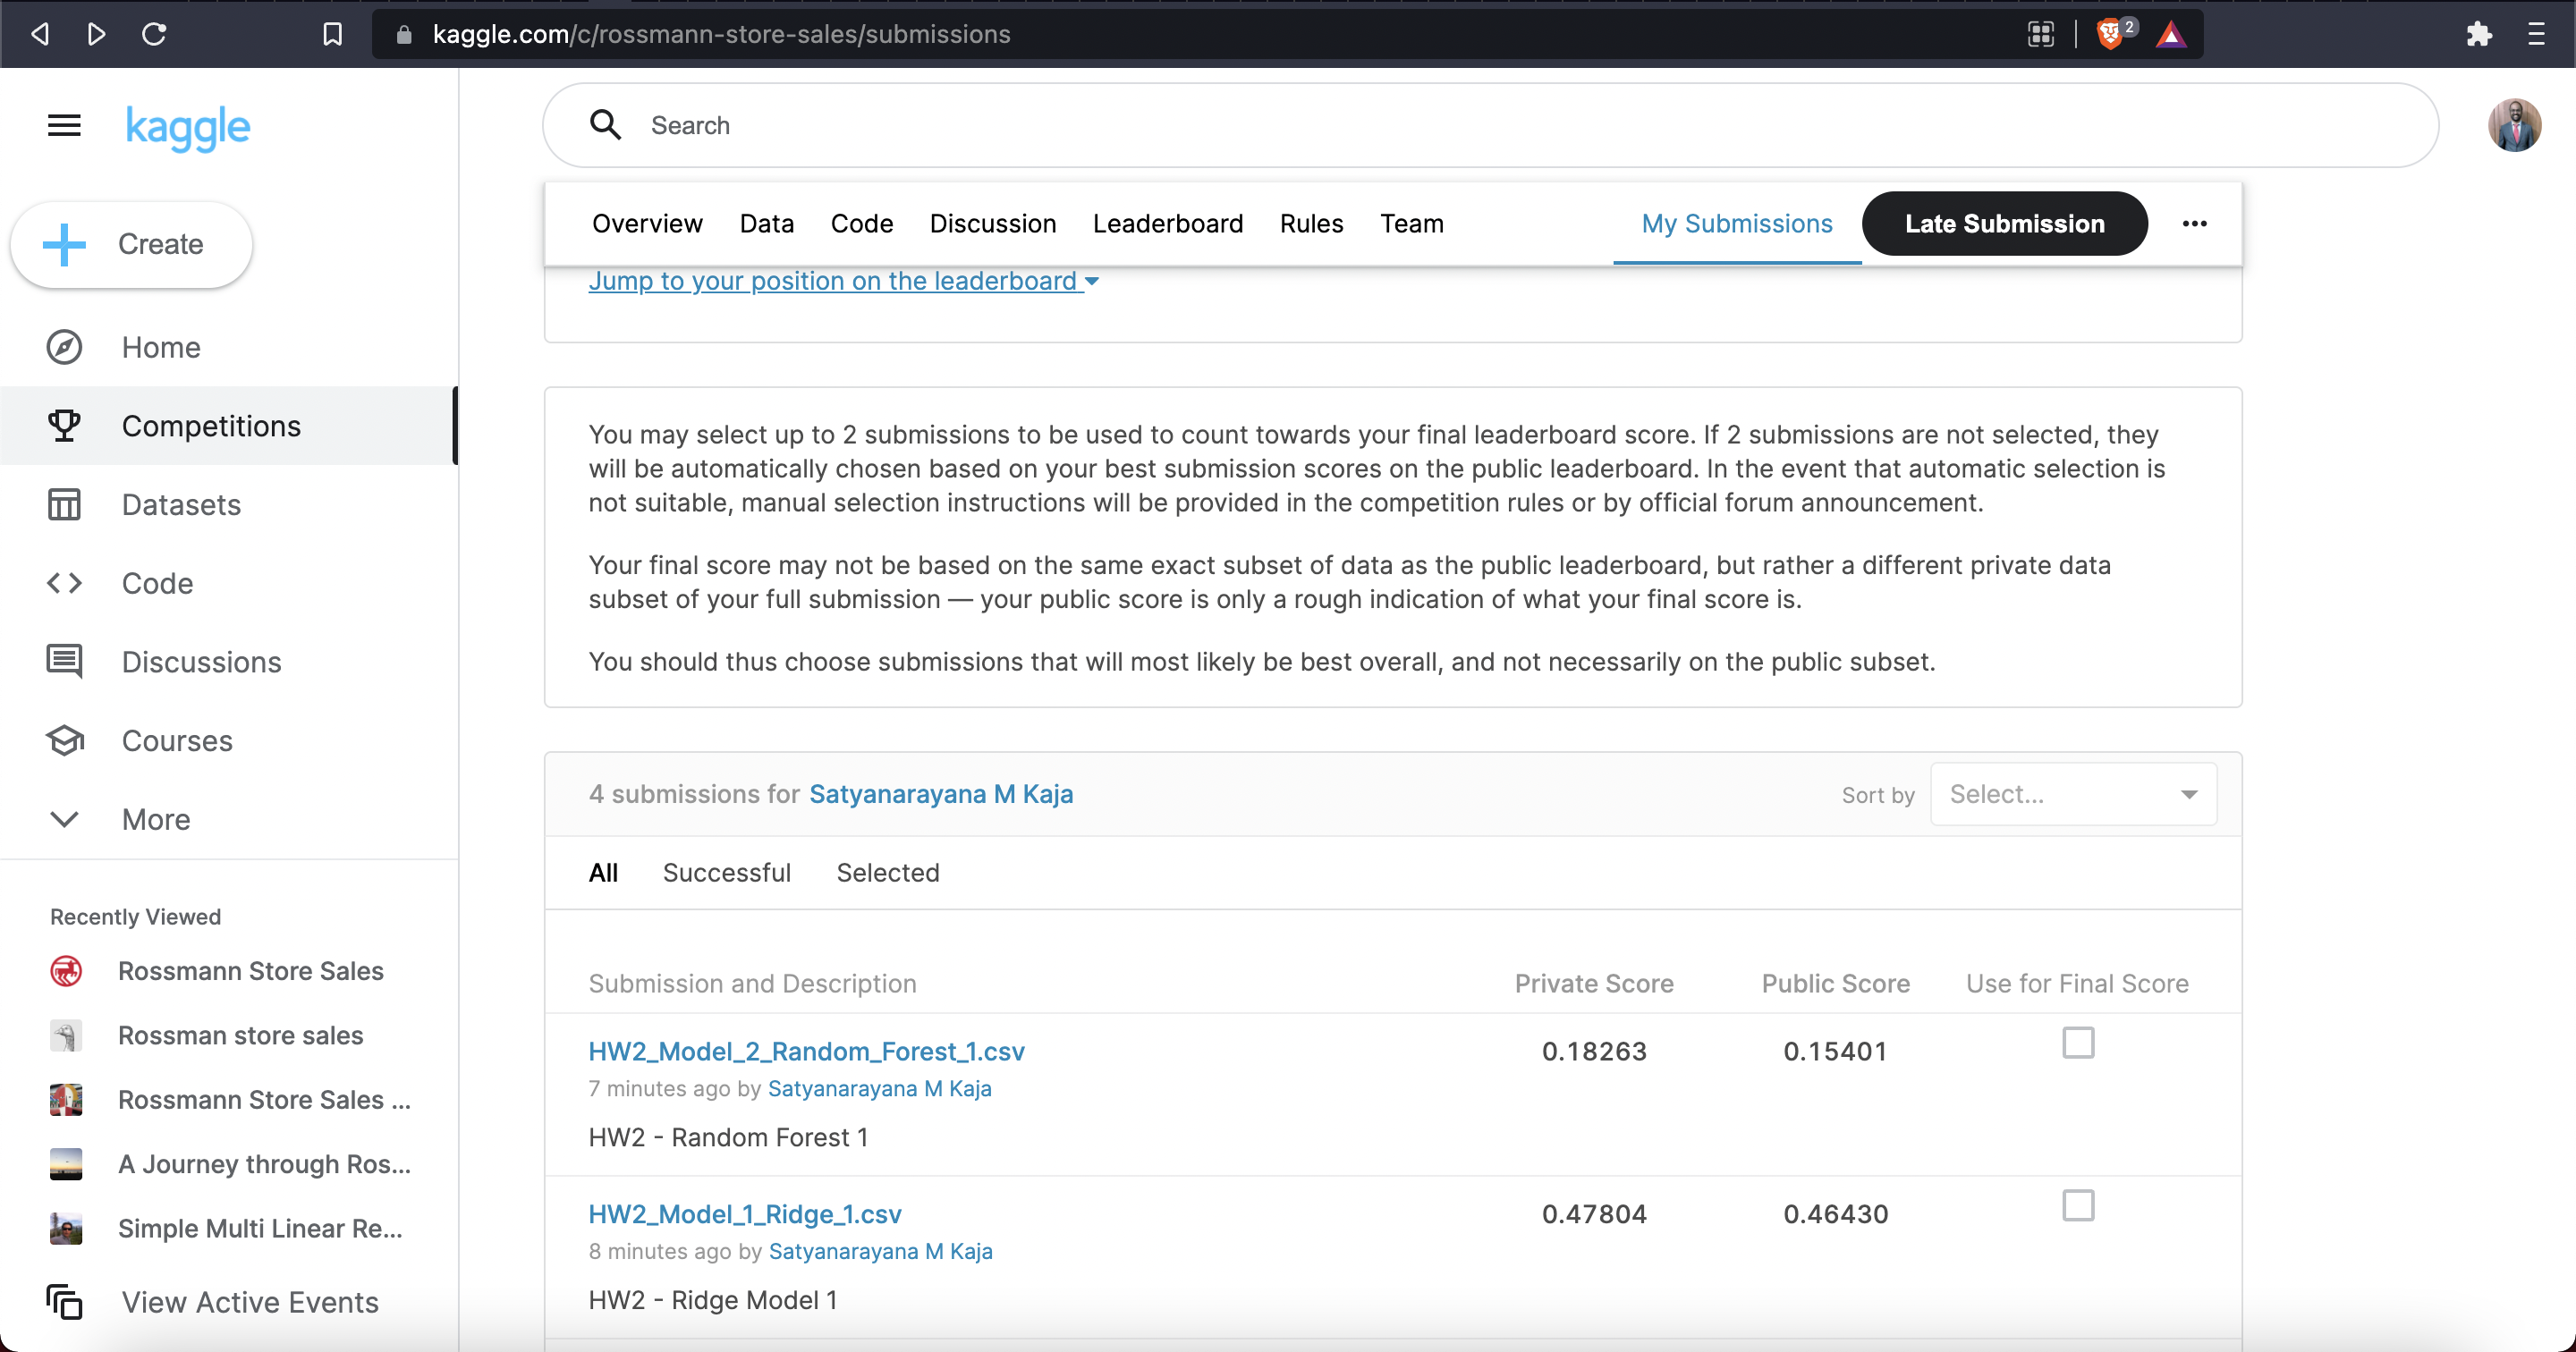
